In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(891, 25)

In [4]:
#let us check if there are any missing values
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
#seperating dependent and independent variables
y = data['Survived']
x = data.drop(['Survived'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify = y, test_size=0.25)

In [8]:
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [9]:
y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [10]:
#shape of training set
x_train.shape, y_train.shape

((668, 24), (668,))

In [11]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [12]:
#creating decision tree function
dt_model = DecisionTreeClassifier(random_state = 10)

In [13]:
#fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [14]:
#checking the training score
dt_model.score(x_train, y_train)

0.9880239520958084

In [15]:
#checking the test score
dt_model.score(x_test, y_test)

0.7533632286995515

In [16]:
#train and test set scores are quite different let us check on individual prediction and deal with probablity instead
y_pred = dt_model.predict_proba(x_test)[:, 1]
y_pred

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.5       , 0.5       ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.     

In [17]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i] >= 0.6:
        y_new.append(1)
    else:
        y_new.append(0)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_new)

0.7533632286995515

Still There is no significant increase in accuracy

Let us try tuning the hyperparameter

In [140]:
# testing on gini impurity criterion
train_accuracy = []
test_accuracy = []
parameters = []
for criterion in ['gini']:
    for max_depth in range(1, 10):
        for min_samples_split in range(20, 30):
                dt_model = DecisionTreeClassifier(criterion = criterion, random_state = 10, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = 5, max_leaf_nodes = 25)
                dt_model.fit(x_train, y_train)
                train_accuracy.append(dt_model.score(x_train, y_train))
                test_accuracy.append(dt_model.score(x_test, y_test))
                parameters.append([criterion, max_depth, min_samples_split, min_samples_leaf])

In [141]:
df = pd.DataFrame(
    {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'parameters': parameters
    }
)
df.head()

,train_accuracy,test_accuracy,parameters
0,0.803892,0.735426,"[gini, 1, 20, 9]"
1,0.803892,0.735426,"[gini, 1, 21, 9]"
2,0.803892,0.735426,"[gini, 1, 22, 9]"
3,0.803892,0.735426,"[gini, 1, 23, 9]"
4,0.803892,0.735426,"[gini, 1, 24, 9]"


In [142]:
df.shape

(90, 3)

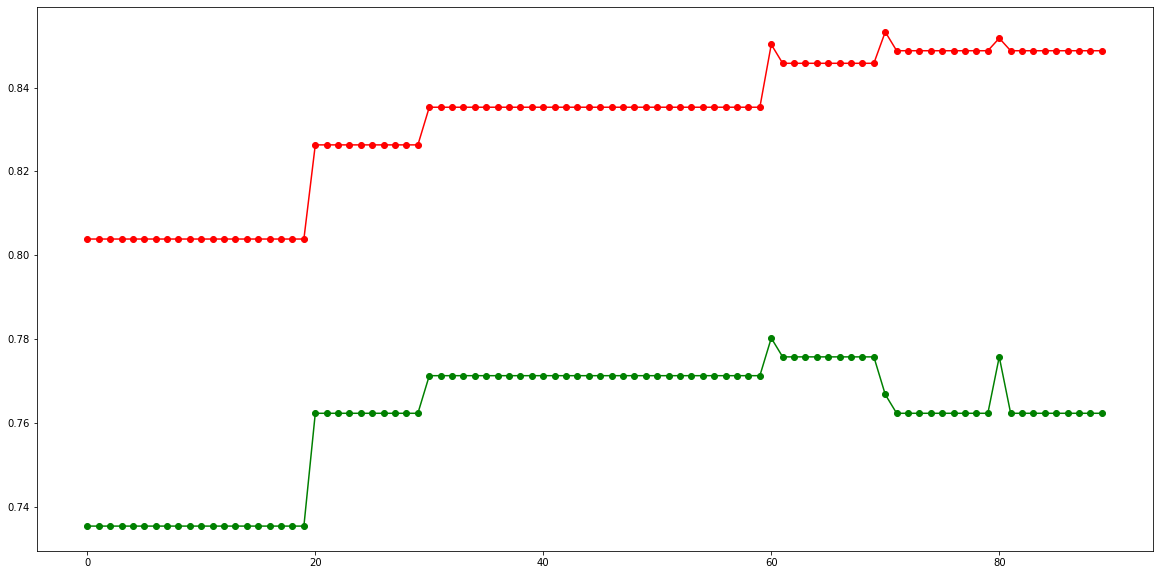

In [143]:
plt.figure(figsize=(20, 10))
x = [i for i in range(0, 90)]
plt.plot(x, train_accuracy, marker = 'o', color = 'r')
plt.plot(x, test_accuracy, marker = 'o', color = 'g')
plt.show()

In [144]:
#60th set of parameters gives us highest accuracy
parameters[60]

['gini', 7, 20, 9]

In [146]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 10, max_depth = 7, min_samples_split = 20, min_samples_leaf = 5, max_leaf_nodes = 25)

In [147]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25, min_samples_leaf=5,
                       min_samples_split=20, random_state=10)

In [148]:
dt_model.score(x_train, y_train)

0.8502994011976048

In [149]:
dt_model.score(x_test, y_test)

0.7802690582959642

In [178]:
from sklearn import tree
!pip3 install graphviz

In [179]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [180]:
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.
